# Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

# Importing the dataset

In [12]:
dataset=pd.read_csv('data.csv')

# No. of Rows and Columns in a table.

In [9]:
dataset.shape

(569, 33)

# Column Names

In [13]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Data Preprocessing

In [19]:
#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed: 32 column
dataset = dataset.dropna(axis=1)

# Visualising the count of M and B cells Where M = Malignant and B = Benign

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


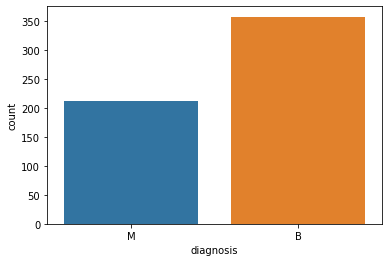

In [20]:
#Get a count of the number of 'M' & 'B' cells
dataset['diagnosis'].value_counts()
#Visualize this count 
sns.countplot(dataset['diagnosis'],label="Count")

In [29]:
#There are now 30 features we can visualize. I decided to plot 10 features at a time. 
#This led to 3 plots containing 10 features each. 
#The means of all the features were plotted together, so were the standard errors and worst dimensions.


# Visualing the Violin Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

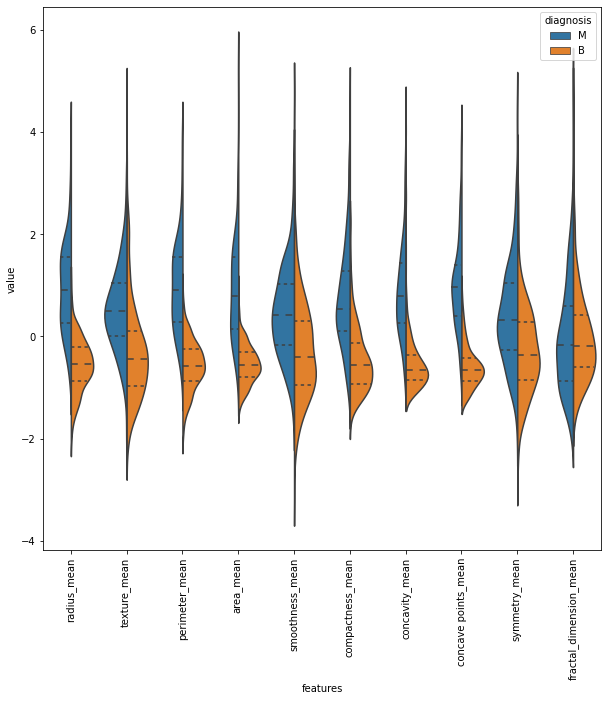

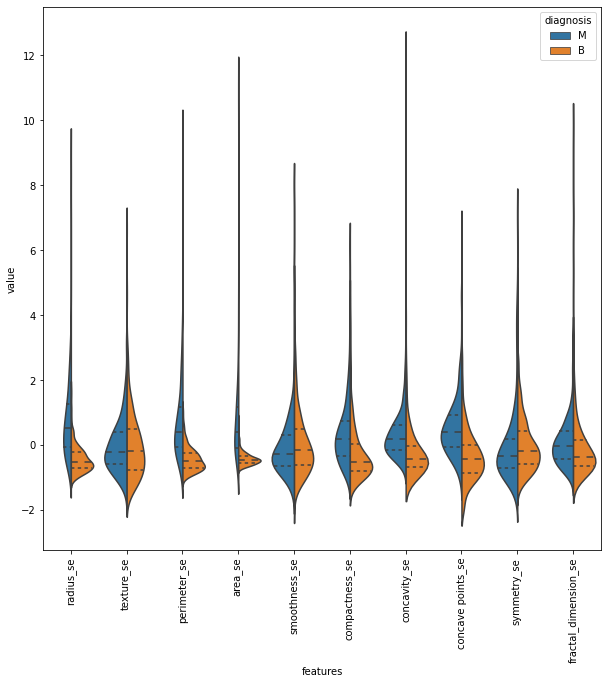

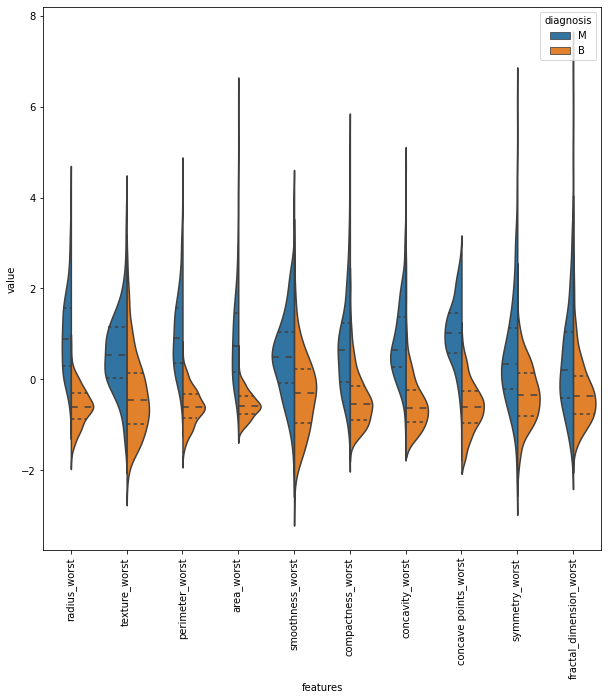

In [30]:
#y includes diagnosis column with M or B values
y= dataset.diagnosis
#drop the column 'id' as it is does not convey any useful info
#drop diagnosis since we are separating labels and features 
list=['id','diagnosis']
#X includes our features
X = dataset.drop(list,axis = 1)
#get the first 10 features
data_dia = y
data = X
data_std = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
#make a violin plot for mean features
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
#get the next 10 features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
#make a violin plot for standard error features
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
#get the last 10 features
data = pd.concat([y,data_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
#make a violin plot for worst dimension features
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# Correlation Map

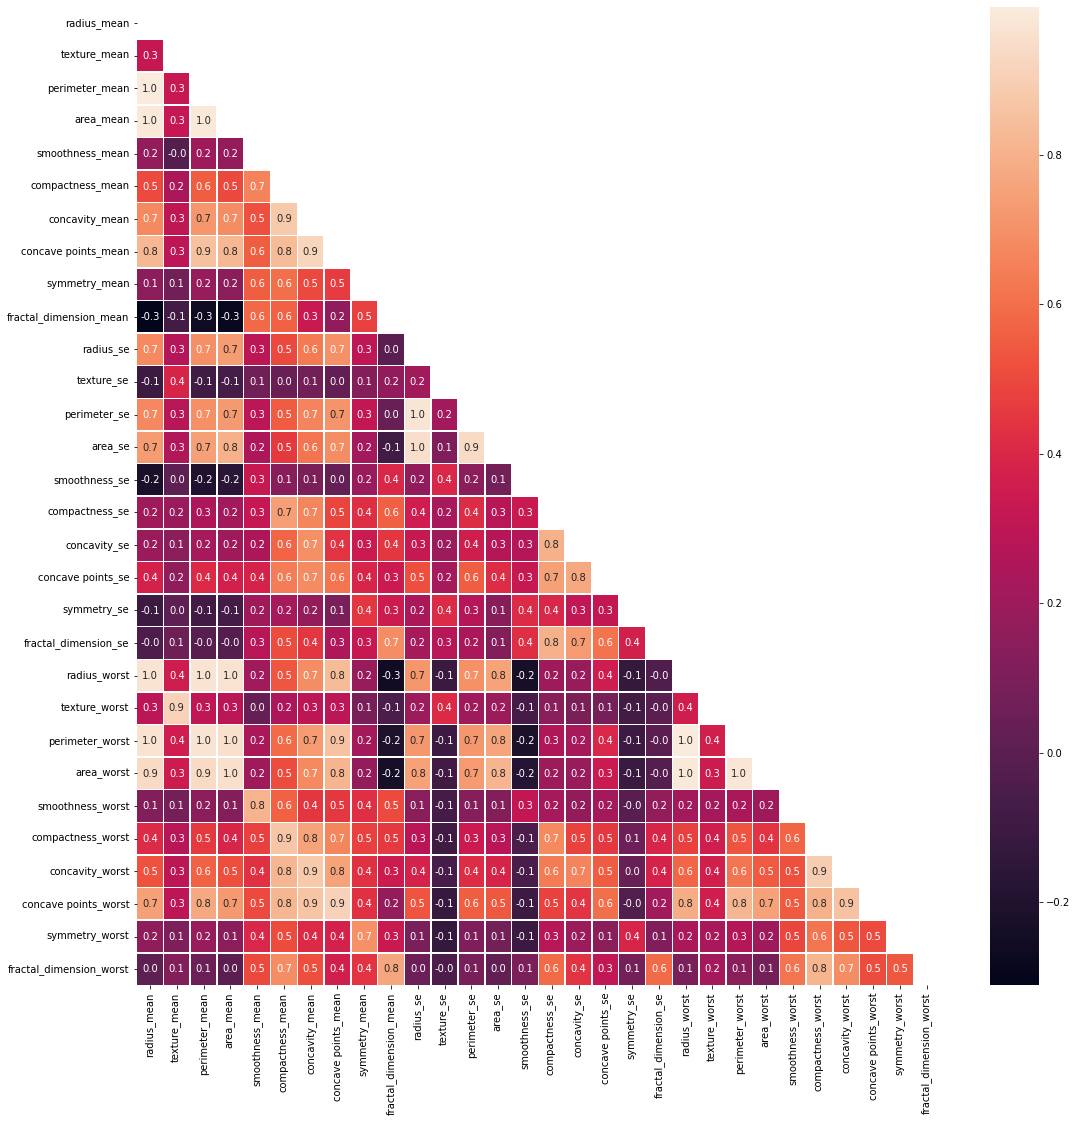

In [32]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

# Boxplots for texture mean vs diagnosis of tumor

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

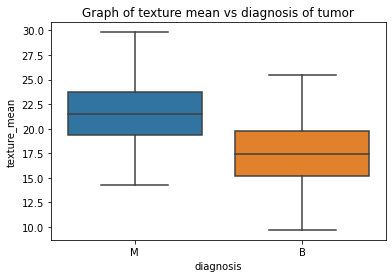

In [33]:
plot = sns.boxplot(x='diagnosis', y='texture_mean', data=dataset, showfliers=False)
plot.set_title("Graph of texture mean vs diagnosis of tumor")

# Boxplots for fractal dimension mean vs diagnosis or tumor

Text(0.5, 1.0, 'Graph of fractal dimension mean vs diagnosis or tumor')

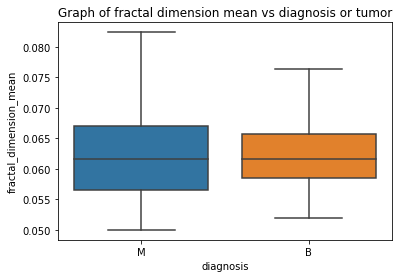

In [34]:
plot = sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=dataset, showfliers=False)
plot.set_title("Graph of fractal dimension mean vs diagnosis or tumor")

# Boxplots for area se vs diagnosis or tumor



Text(0.5, 1.0, 'Graph of area se vs diagnosis or tumor')

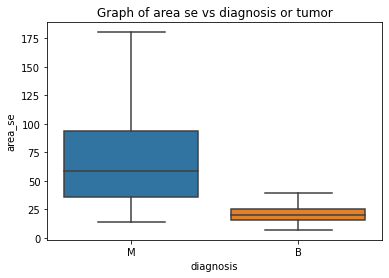

In [35]:
plot = sns.boxplot(x='diagnosis', y='area_se', data=dataset, showfliers=False)
plot.set_title("Graph of area se vs diagnosis or tumor")

# Boxplots for concave points se vs diagnosis or tumor

Text(0.5, 1.0, 'Graph of concave points se vs diagnosis or tumor')

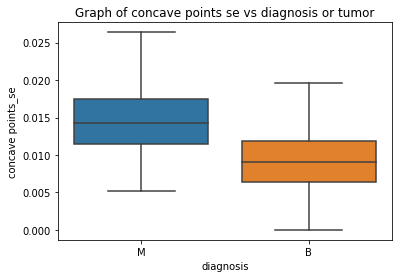

In [37]:
plot = sns.boxplot(x='diagnosis', y='concave points_se', data=dataset, showfliers=False)
plot.set_title("Graph of concave points se vs diagnosis or tumor")

# Boxplots for radius worst vs diagnosis or tumor

Text(0.5, 1.0, 'Graph of radius worst vs diagnosis or tumor')

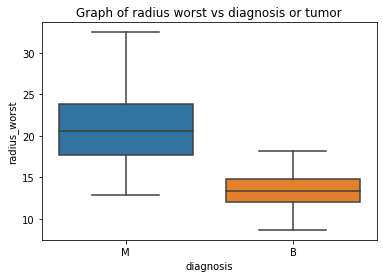

In [38]:
plot = sns.boxplot(x='diagnosis', y='radius_worst', data=dataset, showfliers=False)
plot.set_title("Graph of radius worst vs diagnosis or tumor")

# Boxplots for area worst vs diagnosis of tumor

Text(0.5, 1.0, 'Graph of area worst vs diagnosis of tumor')

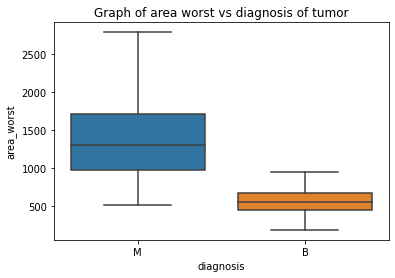

In [39]:
plot = sns.boxplot(x='diagnosis', y='area_worst', data=dataset, showfliers=False)
plot.set_title("Graph of area worst vs diagnosis of tumor")

# New dataframe with only the desired feature for t test 

In [49]:
from scipy import stats
from IPython.display import display
new = pd.DataFrame(data=dataset[['area_worst', 'diagnosis']])
new = new.set_index('diagnosis')
stats.ttest_ind(new.loc['M'], new.loc['B'])

Ttest_indResult(statistic=array([25.72159026]), pvalue=array([2.8288477e-97]))

In [50]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Machine Learning
## Encoding categorical data values

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
print(labelencoder_y.fit_transform(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

# Splitting data into train set and test set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)

# Feature Scaling

In [54]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset

In [55]:
# Define a function which trains models
def models(X_train,y_train):
    
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, svc_rbf, tree, forest
#get the training results
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9794721407624634
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9794721407624634
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9824046920821115
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9912023460410557


# Visualing the Models

In [ ]:
def graphs():
  #Logistic Regression

  #SVC Linear

  #SVC rbf

  #DecisionTreeClassifier

  #Random Forest Classifier


graphs()

# Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
 
 cm = confusion_matrix(y_test, model[i].predict(X_test))
 
 TN = cm[0][0]
 TP = cm[1][1]
 FN = cm[1][0]
 FP = cm[0][1]
 
 print(cm)
 print('Model[{}] Testing Accuracy = "{}"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
 print()# Print a new line

[[142   1]
 [  2  83]]
Model[0] Testing Accuracy = "0.9868421052631579"

[[141   2]
 [  4  81]]
Model[1] Testing Accuracy = "0.9736842105263158"

[[141   2]
 [  3  82]]
Model[2] Testing Accuracy = "0.9780701754385965"

[[129  14]
 [  5  80]]
Model[3] Testing Accuracy = "0.9166666666666666"

[[139   4]
 [  6  79]]
Model[4] Testing Accuracy = "0.956140350877193"



# Classification Report

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
 print('Model ',i)
 #Check precision, recall, f1-score
 print(classification_report(y_test, model[i].predict(X_test)))
 #Another way to get the models accuracy on the test data
 print(accuracy_score(y_test, model[i].predict(X_test)))
 print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.98      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228

0.9868421052631579

Model  1
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.98      0.95      0.96        85

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

0.9736842105263158

Model  2
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.98      0.96      0.97        85

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighte

# Hyper Parameter Tunning

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#make the scoring function with a beta = 2
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# Create logistic regression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.arange(0, 1, 0.001)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, scoring=ftwo_scorer, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

predictions = best_model.predict(X_test)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + 0.5 * alpha * np.dot(w, w)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:127: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + 0.5 * alpha * np.dot(w, w)
/usr/loca

Best Penalty: l2
Best C: 0.591
Accuracy score 0.986842
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.98      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228

[[142   1]
 [  2  83]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5005 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError:

# Threshold Moving

In [67]:
y_scores = best_model.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)
def adjusted_classes(y_scores, t):
#This function adjusts class predictions based on the prediction threshold (t).Works only for binary classification problems.
    return [1 if y >= t else 0 for y in y_scores]
def precision_recall_threshold(p, r, thresholds, t=0.5):
    #plots the precision recall curve and shows the current value for each by identifying the classifier's threshold (t).
    
    # generate new class predictions based on the adjusted classes
    #function above and view the resulting confusion matrix
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    print(classification_report(y_test, y_pred_adj))
precision_recall_threshold(p, r, thresholds, 0.42)

     pred_neg  pred_pos
neg       141         2
pos         1        84
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.98      0.99      0.98        85

    accuracy                           0.99       228
   macro avg       0.98      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228



# Graph of recall and precision VS threshold

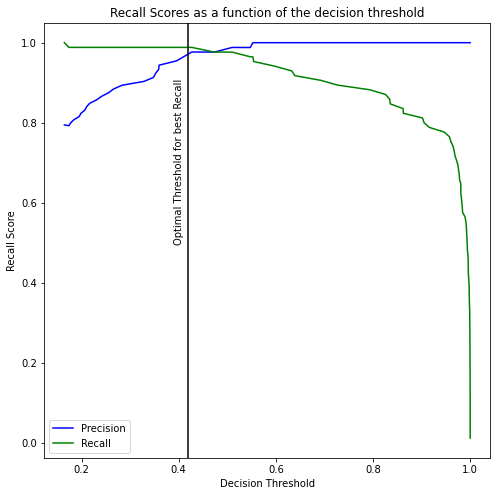

In [70]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
 plt.figure(figsize=(8, 8))
 plt.title("Recall Scores as a function of the decision threshold")
 plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.axvline(x=.42, color='black')
 plt.text(.39,.50,'Optimal Threshold for best Recall',rotation=90)
 plt.ylabel("Recall Score")
 plt.xlabel("Decision Threshold")
 plt.legend(loc='best')
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

# AUC Score

0.9979432332373509


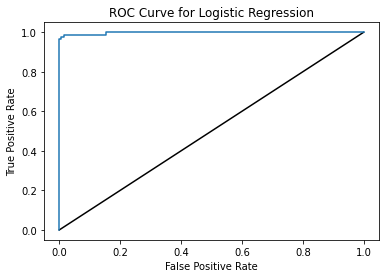

In [71]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k-')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()